<a href="https://colab.research.google.com/github/nicoavilan/QAI-Summer-School/blob/main/S5_Grover's_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q-AI: Summer School on Quantum Artificial Intelligence**

Universidad del Rosario - School of Science and Engineering

Université du Québec à Trois-Rivières (UQTR), Canada

**Fundamentals of Quantum Computing** (session 5)



Professor: [Nicolás Avilán Vargas](http://www.linkedin.com/in/nicoavilanv)

nicolasg.avilan@urosario.edu.co

# **Fundamentals of Quantum Computing (session 5)**




This guide on Grover's Algorithm for undergraduates explains oracle construction, diffusion operator, and amplitude amplification using linear algebra and Dirac notation. It includes Qiskit code for 2- and 3-qubit circuits in Google Colab, visualizations, and exercises on key concepts, emphasizing state evolution, tensor products, and qubit ordering.

## **Grover's Algorithm**

**Motivation** (Taken from Grover’s original paper)

"Imagine a phone directory containing $N$ names arranged in *completely random order*. In order to find someone's phone number with a 50% probability, any classical algorithm (whether deterministic or probabilistic) will need to look at a minimum of $N/2$ names. Quantum mechanical systems can be in a superposition of states and simultaneously examine multiple names. By properly adjusting the phases of various operations, successful computations reinforce each other while others interfere randomly. As a result, the desired phone number can be obtained in only $O(\sqrt{N})$ steps. The algorithm is within a small constant factor of the fastest possible quantum mechanical algorithm."




Grover’s Algorithm, **proposed by Lov Grover in 1996**, is a quantum algorithm that provides a quadratic speedup for unstructured search problems. Given a search space of $N = 2^n$ items (where $n$ is the number of qubits), it finds a marked item with high probability in $O(\sqrt{N})$ queries, compared to $ O(N) $ for classical algorithms.

### **Conceptual Foundations**

**Problem Setup**

Grover's Algorithm searches for a marked state $|w\rangle$ in an $n$-qubit Hilbert space of size $N = 2^n$. The search space is represented by the computational basis ${|x\rangle : x \in \{0,1\}^n}$. The goal is to find $|w\rangle$ with high probability **using an oracle** that identifies $|w\rangle$.

The initial state is a uniform superposition:

$$
|\psi_0\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle = \left( \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \right)^{\otimes n}
$$

The algorithm applies iterative steps to amplify the amplitude of $|w\rangle$.

**The Oracle**

The oracle is a unitary operator $U_w$ that marks the target state by flipping its phase:
$$
U_w |x\rangle = (-1)^{f(x)} |x\rangle, \qquad
\quad f(x) = \begin{cases} 1 & \text{if } x = w \\ 0 & \text{otherwise} \end{cases}
$$

In matrix form for $n=2$, if $w = 11$:

$$
U_w = \text{diag}(1, 1, 1, -1) \quad \text{for basis } |00\rangle, |01\rangle, |10\rangle, |11\rangle
$$

The oracle reflects the state across all non-target states, leaving $|w\rangle$ negated.

**Grover Diffusion Operator**

The diffusion operator $D$ (inversion about the mean) amplifies the marked state's amplitude. It is defined as:

$$
D = 2|\psi_0\rangle\langle\psi_0| - I$$

For $n=2$,

$$
|\psi_0\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)
$$

so:
$$
|\psi_0\rangle\langle\psi_0| = \frac{1}{4} \begin{pmatrix} 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 \end{pmatrix}, \quad D = \frac{1}{2} \begin{pmatrix} -1 & 1 & 1 & 1 \\ 1 & -1 & 1 & 1 \\ 1 & 1 & -1 & 1 \\ 1 & 1 & 1 & -1 \end{pmatrix}
$$

This operator inverts amplitudes about their mean, boosting $|w\rangle$.

**Amplitude Amplification**

Each Grover iteration applies $U_w$ followed by $D$, rotating the state vector in the plane spanned by $|w\rangle$ and the orthogonal state
$$|s'\rangle = \frac{1}{\sqrt{N-1}} \sum_{x \neq w} |x\rangle$$

The initial state is:
$$|\psi_0\rangle = \cos(\theta/2) |s'\rangle + \sin(\theta/2) |w\rangle, \quad \theta = 2 \arcsin\left(\frac{1}{\sqrt{N}}\right)$$

Each iteration rotates by $\theta$, and after
$$k \approx \frac{\pi}{2\theta} \approx \frac{\pi \sqrt{N}}{4}$$ iterations, the state is close to $|w\rangle$.

1.5 Probabilistic Nature and Complexity

The algorithm succeeds with probability $\sin^2((2k+1)\theta/2)$, maximized at $k \approx \lfloor \pi \sqrt{N}/4 \rfloor$. For $n=2$,
$N=4$, one iteration suffices. The quadratic speedup ($O(\sqrt{N})$) is a key quantum advantage.

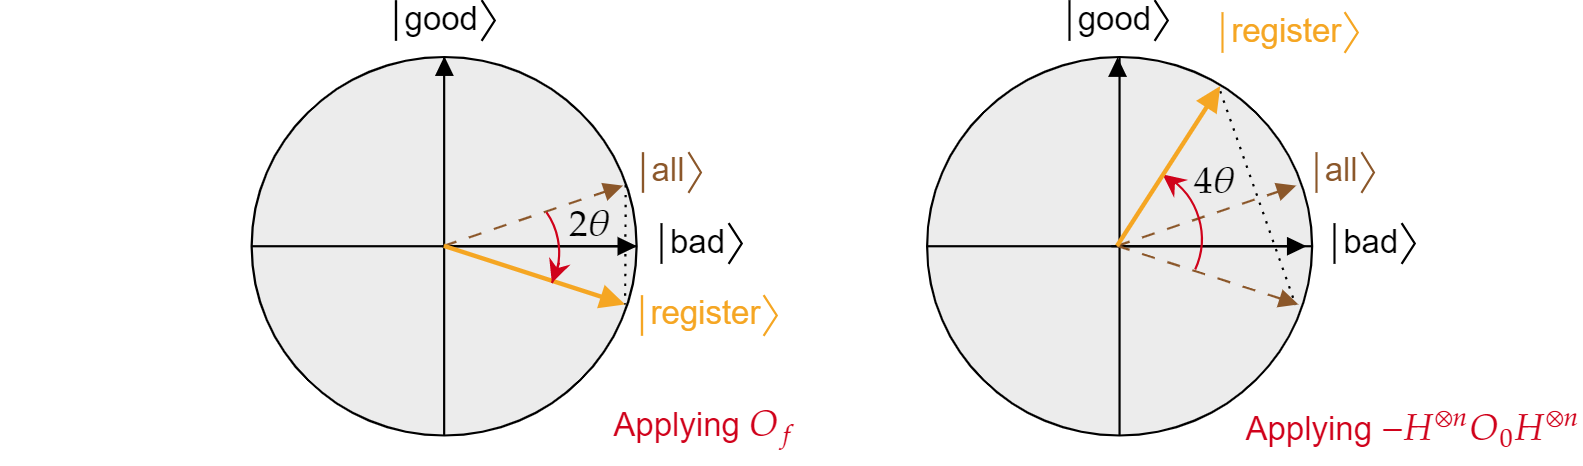

 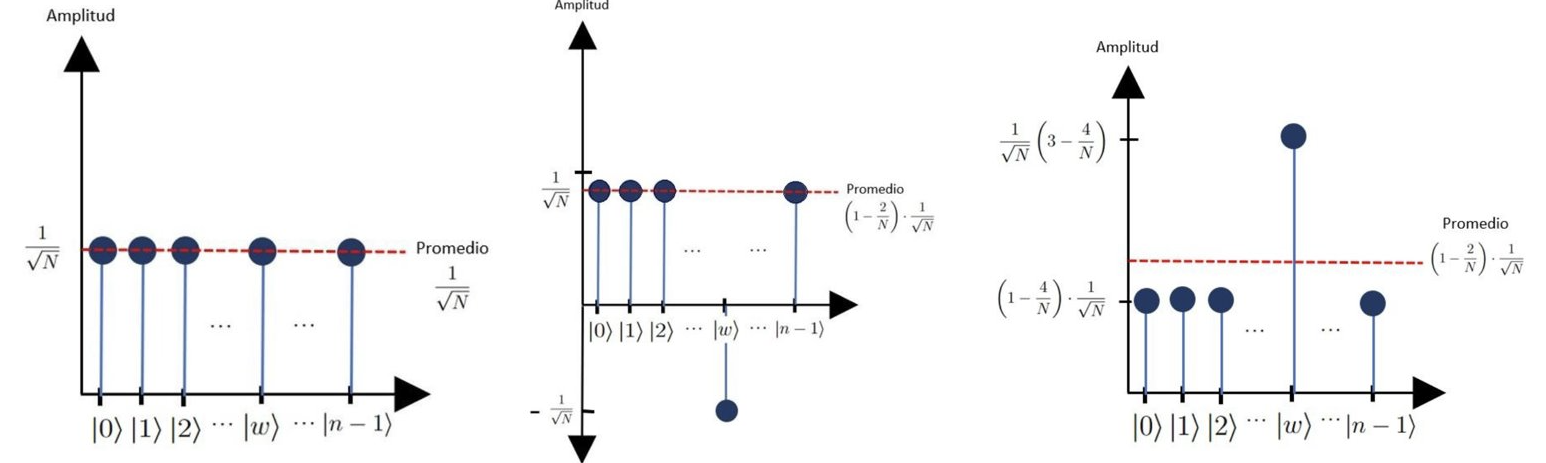

## **Oracles in Quantum Algorithms**

Oracles are fundamental to quantum algorithms, acting as black-box functions that encode problem-specific information. They enable quantum speedups in tasks like search (Grover's Algorithm), function evaluation (Deutsch-Jozsa), and pattern identification (Bernstein-Vazirani).

### **Conceptual Foundations**

**What is an Oracle?**

An oracle is a unitary operator $U_f$ that encodes a function

$$f: \{0,1\}^n \to \{0,1\}$$

(or more generally, to $\{0,1\}^m $) into a quantum circuit. It operates on $n$ input qubits and, optionally, ancillary qubits, modifying the quantum state to reflect $f$'s output without computing it explicitly.

For a function $f(x)$, the oracle typically acts as:

$$U_f |x\rangle |y\rangle = |x\rangle |y \oplus f(x)\rangle \quad \text{(standard form)}$$

or, for phase oracles:

$$U_f |x\rangle = (-1)^{f(x)} |x\rangle \quad \text{(phase kickback)}$$

The phase form is common in algorithms like Deutsch-Jozsa and Grover's, leveraging quantum parallelism to evaluate $f$ on all inputs simultaneously.

**Linear Algebra and Dirac Notation**

In the computational basis ${|x\rangle}$, an oracle is a $2^n \times 2^n$ unitary matrix (or $2^{n+m} \times 2^{n+m}$ with ancilla). For a phase oracle with

$$f(x) = \begin{cases} 1 & \text{if } x = w \\ 0 & \text{otherwise} \end{cases}$$

$$U_f = \text{diag}(1, \dots, 1, -1, 1, \dots, 1), \quad -1 \text{ at position } w$$

For example, for $n=2$, $w = 11$:

$$U_f |11\rangle = -|11\rangle, \quad U_f |x\rangle = |x\rangle \text{ for } x \neq 11$$

 The matrix is diagonal, with a $-1$ at index 3 ($|11\rangle $).

**Quantum State Evolution**

Oracles transform the input state $|\psi\rangle = \sum_x \alpha_x |x\rangle$. For a uniform superposition $|\psi_0\rangle = \frac{1}{\sqrt{2^n}} \sum_x |x\rangle$:

$$U_f |\psi_0\rangle = \frac{1}{\sqrt{2^n}} \sum_x (-1)^{f(x)} |x\rangle$$

This phase kickback marks specific states, enabling algorithms to amplify or analyze them.

## **Qiskit implementation**

In [ ]:
%pip install qiskit --quiet

In [ ]:
%pip install pylatexenc --quiet

In [ ]:
%pip install qiskit-aer --quiet

This guide is compatible with Qiskit version 2.1.1

In [ ]:
import qiskit
print(qiskit.__version__)

Import Qiskit modules

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

**The Oracle**

$\text{CZ}|11\rangle =-|11\rangle $

In [ ]:
n = 2
qc = QuantumCircuit(n)
qc.h(range(n))
qc.cz(0, 1)
state = Statevector.from_instruction(qc)
display(state.draw('latex'))
qc.draw('mpl')

**Grover's algorithm**

In [ ]:
n = 2
qc = QuantumCircuit(n, n)
qc.ry(np.pi/2, [0, 1]) # |++⟩
qc.barrier()
qc.cz(0, 1) # Oracle for |11⟩
qc.barrier()
qc.ry(np.pi/2, [0, 1]) # Diffusion
qc.cz(0, 1)
qc.ry(-np.pi/2, [0, 1])

state = Statevector.from_instruction(qc)
state.draw('latex')

In [ ]:
qc.measure([0, 1], [0, 1])
qc.draw('mpl')

In [ ]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print("Bell state counts:", counts)

In [ ]:
plot_histogram(counts)

# Additional Resources

* [Lov K. Grover, A fast quantum mechanical algorithm for database search](https://arxiv.org/pdf/quant-ph/9605043)

* [IBM Learning: Fundamentals of quantum algorithms - Grover algorithm](https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/grover-algorithm/introduction)

* [Microsoft Learn: Theory of Grover's search algorithm](https://learn.microsoft.com/en-us/azure/quantum/concepts-grovers)

To report errors or suggestions: nicolasg.avilan@urosario.edu.co